In [1]:
%matplotlib inline
import networkx as nx

## 代表的なグラフ

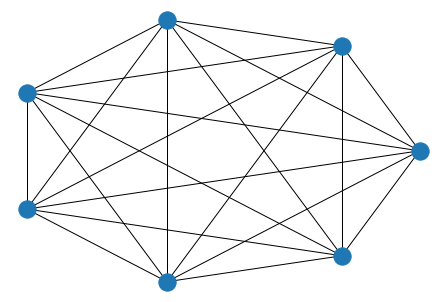

In [2]:
# 完全グラフ
nx.draw_circular(nx.complete_graph(7))

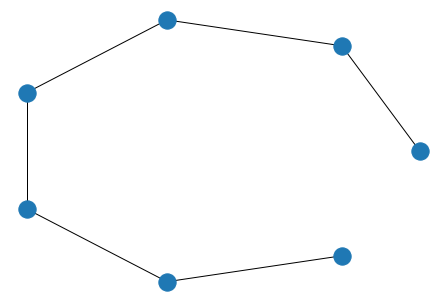

In [3]:
# 道
nx.draw_circular(nx.path_graph(7))

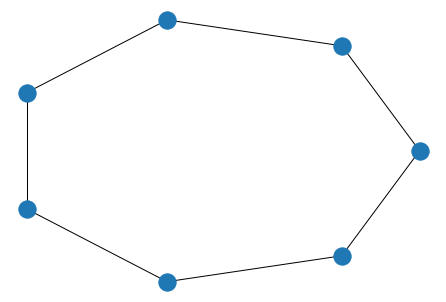

In [4]:
# 閉路
nx.draw_circular(nx.cycle_graph(7))

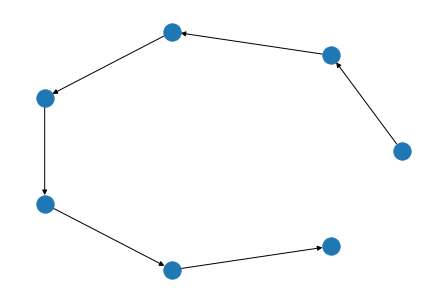

In [5]:
# 有向道
def dpath(n):
    g = nx.DiGraph()
    for i in range(n-1): 
        g.add_edge(i, i+1)
    return g

nx.draw_circular(dpath(7), arrows=True)

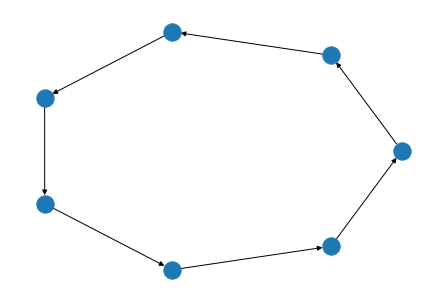

In [6]:
# 有向閉路
def dcycle(n):
    g = nx.DiGraph()
    for i in range(n-1): 
        g.add_edge(i, i+1)
    g.add_edge(n-1, 0)
    return g

nx.draw_circular(dcycle(7), arrows=True)

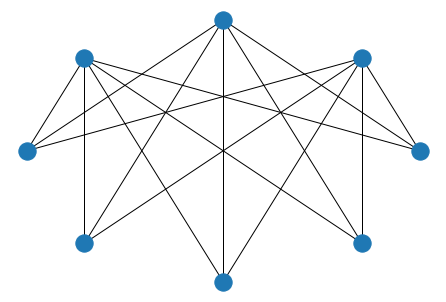

In [7]:
# 完全二部グラフ
nx.draw_shell(nx.complete_multipartite_graph(5, 3))

In [8]:
# 正則グラフであることの判定
def is_regular(G):
    d = nx.degree_histogram(G)
    while 0 in d: d.remove(0)
    if len(d) == 1:
        return True
    else:
        return False

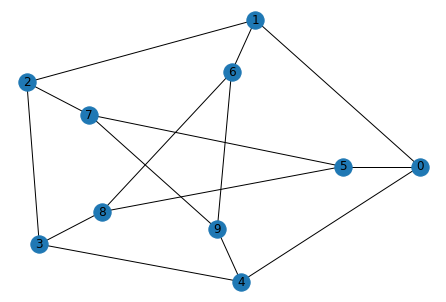

In [9]:
import math
mypos = {i : ((10*(3-i/5)*math.cos(2*math.pi*(i%5)/5)), (10*(3-i/5)*math.sin(2*math.pi*(i%5)/5))) for i in range(10)}
nx.draw(nx.petersen_graph(), with_labels=True, pos=mypos)

In [10]:
is_regular(nx.petersen_graph())

True

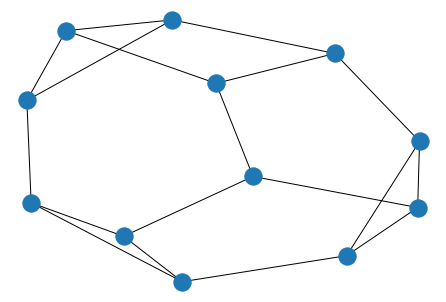

In [11]:
nx.draw_kamada_kawai(nx.frucht_graph())

In [12]:
is_regular(nx.frucht_graph())

True

## グラフの代表的な構成法

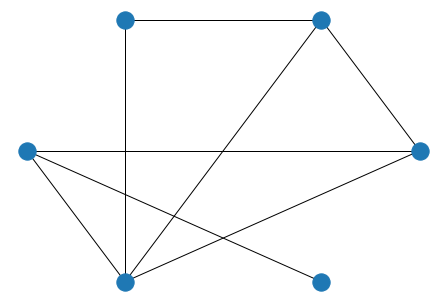

In [13]:
# 補グラフ (準備)
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4, 5, 6])
G1.add_edges_from([(1, 2), (1, 4), (1, 5), (2, 3), (2, 5), (3, 5), (4, 5), (4, 6)])
nx.draw_circular(G1)

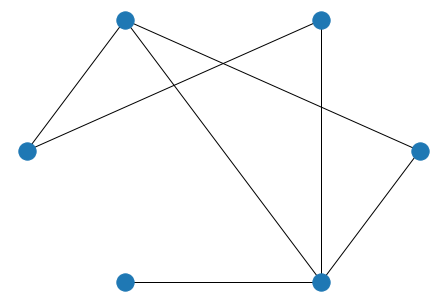

In [14]:
# 補グラフ
nx.draw_circular(nx.complement(G1))

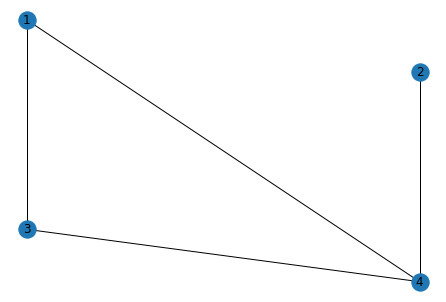

In [15]:
# 直積 (準備1)
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4])
G1.add_edges_from([(1, 3), (1, 4), (2, 4), (3, 4)])
mypos1 = {1: (0, 10), 2: (5, 8), 3: (0, 2), 4: (5, 0)}
nx.draw(G1, pos=mypos1, with_labels=True)

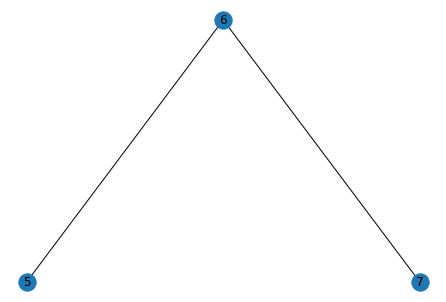

In [16]:
# 直積 (準備2)
G2 = nx.Graph()
G2.add_nodes_from([5, 6, 7])
G2.add_edges_from([(5, 6), (6, 7)])
mypos2 = {5: (0, 0), 6: (10, 2), 7: (20, 0)}
nx.draw(G2, pos=mypos2, with_labels=True)

In [17]:
# 直積
G3 = nx.cartesian_product(G1, G2)

In [18]:
G3.nodes

NodeView(((1, 5), (1, 6), (1, 7), (2, 5), (2, 6), (2, 7), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7)))

In [19]:
G3.edges

EdgeView([((1, 5), (3, 5)), ((1, 5), (4, 5)), ((1, 5), (1, 6)), ((1, 6), (3, 6)), ((1, 6), (4, 6)), ((1, 6), (1, 7)), ((1, 7), (3, 7)), ((1, 7), (4, 7)), ((2, 5), (4, 5)), ((2, 5), (2, 6)), ((2, 6), (4, 6)), ((2, 6), (2, 7)), ((2, 7), (4, 7)), ((3, 5), (4, 5)), ((3, 5), (3, 6)), ((3, 6), (4, 6)), ((3, 6), (3, 7)), ((3, 7), (4, 7)), ((4, 5), (4, 6)), ((4, 6), (4, 7))])

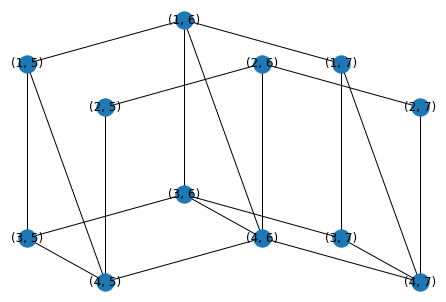

In [20]:
mypos3 = {(u, v): (mypos1[u][0]+mypos2[v][0], mypos1[u][1]+mypos2[v][1]) for u in G1.nodes() for v in G2.nodes()}
nx.draw(G3, pos=mypos3, with_labels=True)

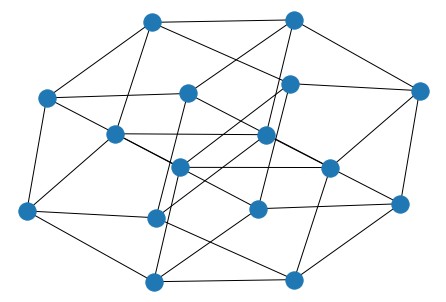

In [21]:
# 立方体グラフ
nx.draw(nx.hypercube_graph(4))

## 部分グラフとしての道と閉路

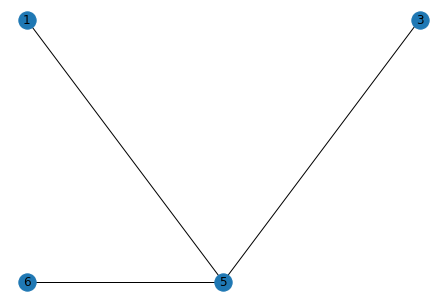

In [22]:
G1 = nx.Graph()
G1.add_nodes_from([1, 3, 5, 6])
G1.add_edges_from([(1, 5), (3, 5), (5, 6)])
mypos = {1: (0, 10), 2: (10, 10), 3: (20, 10), 4: (20, 0), 5: (10, 0), 6: (0, 0)}
nx.draw(G1, pos=mypos, with_labels=True)

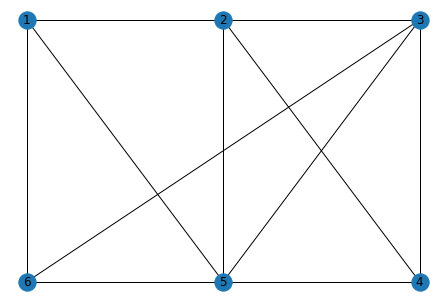

In [23]:
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_edges_from([(1, 2), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])
nx.draw(G2, pos=mypos, with_labels=True)

In [24]:
def is_subgraph(g, h): # True iff g が h の部分グラフ
    for v in g.nodes():
        if v not in h.nodes():
            return False
    for e in g.edges():
        if e not in h.edges():
            return False
    return True

In [25]:
is_subgraph(G1, G2)

True

## グラフの連結性と連結成分

In [26]:
V = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

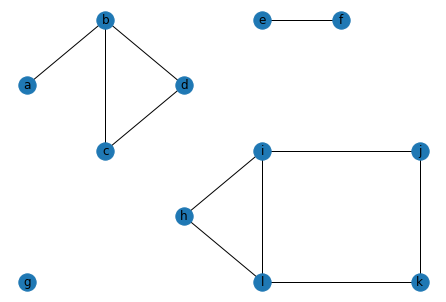

In [27]:
# 非連結なグラフの例
G1 = nx.Graph()
G1.add_nodes_from(V)
G1.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('e', 'f'), ('h', 'i'), \
                   ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')])
mypos1 = {'a': (0, 15), \
          'b': (5, 20), \
          'c': (5, 10), \
          'd': (10, 15), \
          'e': (15, 20), \
          'f': (20, 20), \
          'g': (0, 0), \
          'h': (10, 5), \
          'i': (15, 10), \
          'j': (25, 10), \
          'k': (25, 0), \
          'l': (15, 0)
        }
nx.draw(G1, pos=mypos1, with_labels=True)

In [28]:
# 連結性の判定
nx.is_connected(G1)

False

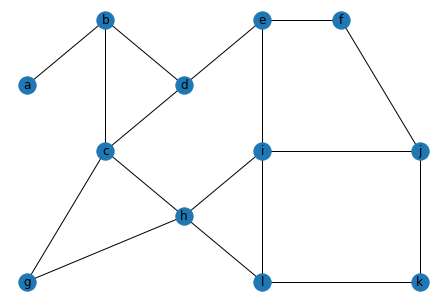

In [29]:
# 連結なグラフの例
G2 = nx.Graph()
G2.add_nodes_from(V)
G2.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'g'), ('c', 'h'), \
                   ('d', 'e'), ('e', 'f'), ('e', 'i'), ('f', 'j'), ('g', 'h'), ('h', 'i'), \
                   ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')])
nx.draw(G2, pos=mypos1, with_labels=True)

In [30]:
# 連結性の判定
nx.is_connected(G2)

True

In [31]:
# 連結成分の数
nx.number_connected_components(G1)

4

In [32]:
# 各連結成分の頂点集合を印字
for c in nx.connected_components(G1):
    print(c)

{'c', 'b', 'd', 'a'}
{'e', 'f'}
{'g'}
{'h', 'l', 'i', 'j', 'k'}


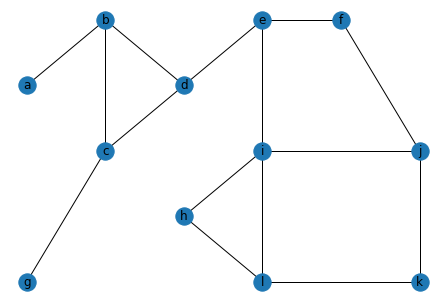

In [33]:
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'g'), \
                  ('d', 'e'), ('e', 'f'), ('e', 'i'), ('f', 'j'), ('h', 'i'), \
                  ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), ('k', 'l')])
nx.draw(G, pos=mypos1, with_labels=True)

In [34]:
# 辺 ('d', 'e') が切断辺であるか，確認
print(nx.number_connected_components(G))
G.remove_edge('d', 'e')
print(nx.number_connected_components(G))

1
2


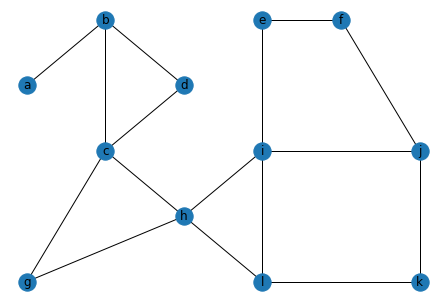

In [35]:
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'g'), \
                  ('c', 'h'), ('e', 'f'), ('e', 'i'), ('f', 'j'), ('g', 'h'), \
                  ('h', 'i'), ('h', 'l'), ('i', 'j'), ('i', 'l'), ('j', 'k'), \
                  ('k', 'l')])
nx.draw(G, pos=mypos1, with_labels=True)

In [36]:
# 頂点 'h' が切断点であるか，確認
print(nx.number_connected_components(G))
G.remove_node('h')
print(nx.number_connected_components(G))

1
2


## 最大性論法による証明

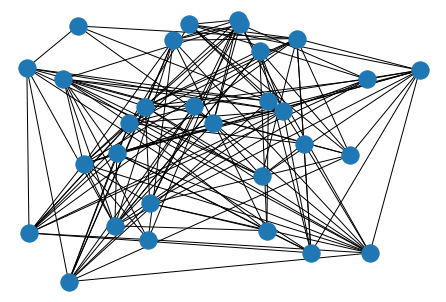

In [37]:
# ランダムグラフの生成
G=nx.fast_gnp_random_graph(30,0.3)
nx.draw_random(G)

In [38]:
# 最小次数
def min_degree(G):
    return min(dict(G.degree()).values())

min_degree(G)

4

In [39]:
# 頂点 0 を始点とする極大道を1つ見つける
# (最大道とは限らない)
t = nx.dfs_successors(G, 0)
v = 0
path = [v]
while v in t:
    v = t[v][0]
    path.append(v)
print(path)

[0, 3, 1, 4, 10, 6, 5, 2, 9, 8, 13, 7, 12, 14, 16, 15, 11, 19, 17, 18, 20, 24, 25, 21, 23, 26, 28]


In [40]:
# 見つけた道の頂点数
len(path)

27

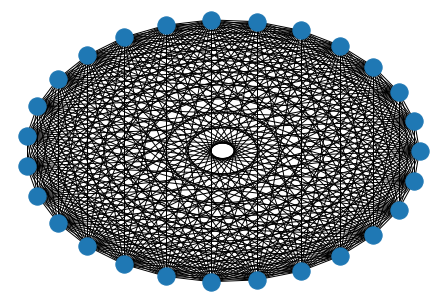

In [41]:
# 完全グラフでも同じことをやってみる
G = nx.complete_graph(27)
nx.draw_circular(G)

In [42]:
min_degree(G)

26

In [43]:
t = nx.dfs_successors(G, 0)
v = 0
path = [v]
while v in t:
    v = t[v][0]
    path.append(v)
print(path)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [44]:
len(path)

27